# Matrix DFS

To traverse all of the positions within a matrix, we can use Depth First Search (DFS), similar to how we would traverse a tree. In a matrix, we can move in all four directions, up, down, left and right.

> Q: Count the unique paths from the top left to the bottom right. A *single path* may only move along 0's and can't visit the same cell more than once (but different paths can visit the same node)

```python
matrix = [[0,0,0,0],
          [1,1,0,0],
          [0,0,0,1],
          [0,1,0,0]]
```

1. We need to consider our base cases (when current recursion terminates). This is when it has exceeded bounds, reached a blocked patch, or found the target
2. We will use backtracking to find every path, since if we dont have a valid way to reach target, well have to backtrack and try another one
3. We also keep a count whenever we hit target

### Base Cases

**1. Unique Path does not exist**

- During traversal we may end up going out of bounds. This means either our column, `c`, or our row, `r` becomes negative, or goes *beyond the bounds* of our matrix. It does not matter which of r and c goes out of bounds because we need a valid `c` AND a valid `r` to continue traversal
- If we have already visited a patch, this is also a base case. In a single path, we arent allowed to revisit a patch
- If we've reached a blocked patch (`1` is on it) we also wanna terminate/backtrack

in all these base cases, we count it as reaching the end of a possible path and return/adding `0` to the count

**2. Unique Path does exist**

If we've reached the right-most column and bottom-most row, then we found a valid path and return/add `1` to the count

## Implementation

- We use a hash set `visit` to keep track of the visited patches.
  - This is preferable over a list, because we can search in $O(1)$ time. Alternatively, could have used a 2D boolean array of size `r*c` to keep track of visited patches
- At any given coordinate `r,c`, we recursive go **down, up, right, left**
- As we backtrack, impt to **remove the current coordinate** from `visit`
  - This ensures we can visit the same patch again with different paths
  - need to add this after recursive calls

In [1]:
# Matrix (2D Grid)
grid = [[0, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]]

# Count paths (backtracking)

# r and c is the current patch that we're on
def dfs(grid, r, c, visit):
    n, m = len(grid), len(grid[0])
    if (
        (r<0 or c<0) or
        (r == n or c == m) or
        (r, c) in visit 
        or grid[r][c] == 1
        ):
        return 0
    if r == n - 1 and c == m - 1:
        return 1

    visit.add((r, c))

    count = 0
    count += dfs(grid, r + 1, c, visit)
    count += dfs(grid, r - 1, c, visit)
    count += dfs(grid, r, c + 1, visit)
    count += dfs(grid, r, c - 1, visit)

    #this is super important for backtracking! essentially remove the history
    #this is so when exploring a different path from an earlier patch, free to explore all patches unexplored by that path
    #need to add this portion after the recursive calls
    visit.remove((r, c))
    return count


## 1. Find the first unique path

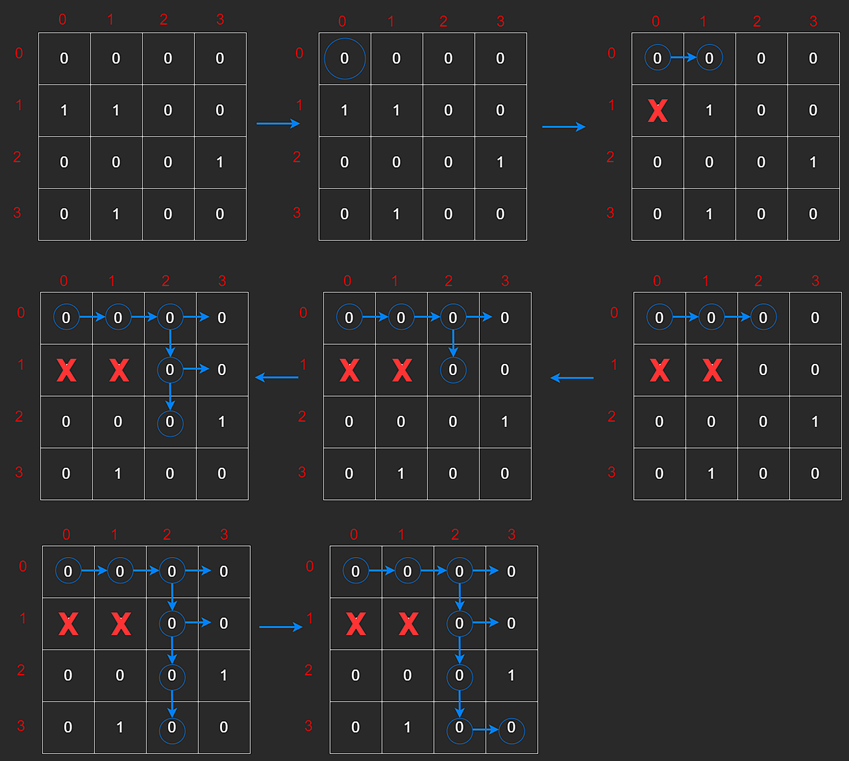

## 2. Backtrack to find another potential distinct path

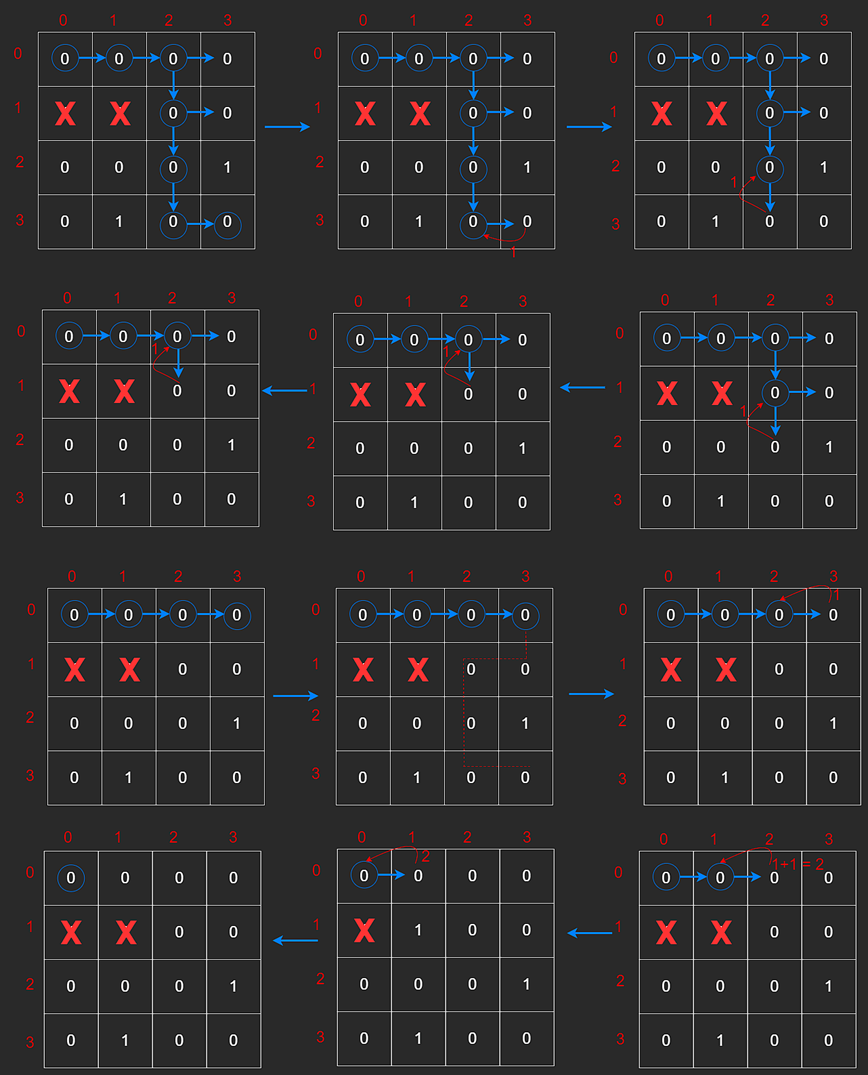

> red dotted line represents the other unique path
> 
> our function returns 2 in the end

---

### Time Complexity

In the worst case, at every patch, we explore 4 possible options - up/down/left/right. We think of this as a decision tree, and the parent node has 4 child nodes.

Worst case we explore every patch, so that the 'height' of the decision tree is $(n*m)$ - the number of patches in the matrix.

The time complexity is thus $O(4^{n*m})$

### Space Complexity

Space is made ip of the recursive call stack, which is the number of patches explored so far - worst case $O(n*m)$

The `visit` hash set is also $O(n*m)$

So total space complexity is $O(n*m)$

---

## Problem: Count Number of Islands (DFS)
Given a 2D grid grid where '1' represents land and '0' represents water, count and return the number of islands.
An island is formed by connecting adjacent lands horizontally or vertically and is surrounded by water. You may assume water is surrounding the grid (i.e., all the edges are water).

*Strategy:*

Loop through once over every grid; if you encounter an island, basically add 1 to the counter and remove that island (turn it into water)
- removing that island means we recursively call on left/right/up/down as long as left/right/up/down has an island patch

In [ ]:
#mysol
def numIslands(grid):

    n,m =len(grid), len(grid[0])
    islands=0

    def bfs(grid, r, c):
        '''remove this island'''
        if (
        (r<0 or c<0) or
        (r == n or c == m) or
        grid[r][c]=='0'
        ):
            return
        
        if grid[r][c]=='1':
            #print(grid)
            grid[r][c]='0'
            
            bfs(grid, r + 1, c)
            bfs(grid, r - 1, c)
            bfs(grid, r, c + 1)
            bfs(grid, r, c - 1)

            #no backtracking needed, dont even need visit history! IIRC this will do BFS/circular radial traversal
    
    for row in range(n):
        for column in range(m):
            if grid[row][column]=='1':
                islands+=1
                bfs(grid,row,column)
    
    return islands

In [ ]:
#better sol
def numIslands(grid):
    m = len(grid)
    n = len(grid[0])

    def grid_search(grid, row, col):
        #set all visited one's to zero, is faster than doing many random if check statements
        grid[row][col] = '0'
        #print(f'visiting {row}, {col}')
        #search left right top bottom
        if col - 1 >= 0:
            if grid[row][col - 1] == '1':
                grid_search(grid, row, col - 1)
        if col + 1 < n:
            if grid[row][col + 1] == '1':
                grid_search(grid, row, col + 1)

        if row - 1 >= 0:
            if grid[row - 1][col] == '1':
                grid_search(grid, row - 1, col)

        if row + 1 < m:
            if grid[row + 1][col] == '1':
                grid_search(grid, row + 1, col)

    islands = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == '1':
                #print('call grid search')
                grid_search(grid, i, j)
                islands += 1

    return islands

In [ ]:
print(numIslands([
    ["0","1","1","1","0"],
    ["0","1","0","1","0"],
    ["1","1","0","0","0"],
    ["0","0","0","0","0"]
  ]))


1


## Problem: Max Area of an Island (DFS)

You are given a matrix `grid` where each elem is either a 0 (representing water) or 1 (representing land).

An island is defined as a group of 1's connected horizontally or vertically. You may assume all four edges of the grid are surrounded by water.

The area of an island is defined as the number of cells within the island.

Return the maximum area of an island in grid. If no island exists, return 0.

In [ ]:
#my modified sol
def maxAreaOfIsland(grid):
    m = len(grid)
    n = len(grid[0])
    maxarea=0

    def grid_search(grid, row, col):
        #set all visited one's to zero, is faster than doing many random if check statements
        grid[row][col] = 0
        print('searching',row,col)

        area=1
        #print(f'visiting {row}, {col}')
        #search left right top bottom
        if col - 1 >= 0:
            if grid[row][col - 1] == 1:
                area+=grid_search(grid, row, col - 1)
        if col + 1 < n:
            if grid[row][col + 1] == 1:
                area+=grid_search(grid, row, col + 1)

        if row - 1 >= 0:
            if grid[row - 1][col] == 1:
                area+=grid_search(grid, row - 1, col)

        if row + 1 < m:
            if grid[row + 1][col] == 1:
                area+=grid_search(grid, row + 1, col)
        print('area so far is',area)
        return area

    for i in range(m):
        for j in range(n):
            if grid[i][j] == 1:
                #print('call grid search')
                area=grid_search(grid, i, j)
                maxarea=max(area,maxarea)

    return maxarea

In [ ]:
def maxAreaOfIsland(grid):
    row = len(grid)
    col = len(grid[0])

    def dfs(i, j):
        #first condition is to make sure in bounds, second condition check if reach water
        #barely any arguments passed in, grid is accessed from outside
        if (i < 0 or i>= row or j < 0 or j >= col or 
            grid[i][j] == 0):
            return 0
        else:
            grid[i][j] = 0
            return 1 + dfs(i+1, j) + dfs(i, j-1) + dfs(i-1, j) + dfs(i, j+1)

    max_area = 0
    for i in range(row):
        for j in range(col):
            if grid[i][j] == 1:
                max_area = max(max_area, dfs(i, j))

    return max_area

In [ ]:
print('ans is',maxAreaOfIsland([
  [0,1,1,0,1],
  [1,0,1,0,1],
  [0,1,1,0,1],
  [0,1,0,0,1]
]))

ans is 6
